In [3]:
import networkx as nx
import numpy as np
from numpy import linalg as LA
import datetime
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq, kmeans, whiten
from itertools import combinations

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
inputfile = '/content/drive/MyDrive/Complex_Networks/HW02/Wiki-Vote.txt'

G = nx.Graph()
with open(inputfile, "r") as file:
    lines = file.readlines()
    for line in lines:
        values = line.strip().split()

        G.add_edges_from([(values[0],
                           values[1])])

In [9]:
num_node = G.number_of_nodes()
nodes = list(G.nodes())

### Degree matrix
D = np.zeros((num_node,num_node))
for i in range(num_node):
  node = nodes[i]
  D[i,i] = G.degree[node]

##Adjacency matrix
A = nx.to_numpy_matrix(G)

### Calculate Laplacian matrix
L = D - A

In [10]:
D

array([[ 28.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  29.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 477., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   1.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   2.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.]])

In [11]:
L

matrix([[ 28.,  -1.,  -1., ...,   0.,   0.,   0.],
        [ -1.,  29.,   0., ...,   0.,   0.,   0.],
        [ -1.,   0., 477., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   1.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   2.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   1.]])

In [30]:
L2 = (nx.laplacian_matrix(G))

In [ ]:
### obtain the eigenvalues and eigenvectors of the laplacian
eigenvalues, eigenvectors = np.linalg.eig(L)

In [13]:
index = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[index]
sorted_eigenvectors = eigenvectors[:,index]

In [16]:
sorted_eigenvalues

array([-5.75512477e-14+0.j, -1.17852781e-14+0.j, -3.99131166e-15+0.j, ...,
        7.44197395e+02+0.j,  7.74122245e+02+0.j,  1.06604400e+03+0.j])

In [17]:
l2 = sorted_eigenvalues[1]
x2 = sorted_eigenvectors[:,1]

In [18]:
x2

matrix([[0.00026776+0.j],
        [0.00026776+0.j],
        [0.00026776+0.j],
        ...,
        [0.00026776+0.j],
        [0.00026776+0.j],
        [0.00026776+0.j]])

In [19]:
x2 = np.squeeze(np.asarray(x2))
x2_real = [np.real(a) for a in x2]

In [21]:
G.nodes()

NodeView(('30', '1412', '3352', '5254', '5543', '7478', '3', '28', '39', '54', '108', '152', '178', '182', '214', '271', '286', '300', '348', '349', '371', '567', '581', '584', '586', '590', '604', '611', '8283', '25', '6', '8', '19', '23', '29', '33', '35', '50', '55', '75', '80', '86', '94', '127', '154', '192', '224', '226', '246', '252', '255', '257', '261', '273', '280', '282', '299', '302', '306', '308', '310', '322', '325', '339', '356', '358', '363', '370', '373', '377', '379', '407', '415', '422', '428', '439', '488', '514', '545', '549', '560', '592', '600', '645', '650', '659', '664', '667', '673', '675', '696', '706', '723', '739', '756', '857', '864', '893', '959', '994', '1131', '3755', '8282', '8284', '4', '10', '38', '56', '130', '140', '147', '151', '232', '243', '341', '606', '5', '61', '89', '93', '153', '163', '167', '168', '175', '34', '132', '135', '171', '183', '216', '219', '227', '228', '236', '250', '258', '259', '274', '285', '290', '298', '301', '304', '317'

In [22]:
x2_real

[0.0002677580641026329,
 0.0002677580641027155,
 0.0002677580641026579,
 0.0002677580641026356,
 0.0002677580641026574,
 0.00026775806410264224,
 0.00026775806410263774,
 0.0002677580641026345,
 0.00026775806410268106,
 0.00026775806410267076,
 0.0002677580641030713,
 0.00026775806410270187,
 0.00026775806410265953,
 0.0002677580641026362,
 0.000267758064102651,
 0.0002677580641026504,
 0.00026775806410270426,
 0.0002677580641025582,
 0.0002677580641026938,
 0.00026775806410258955,
 0.00026775806410264853,
 0.0002677580641026578,
 0.0002677580641028277,
 0.0002677580641027753,
 0.00026775806410271033,
 0.0002677580641027083,
 0.0002677580641027048,
 0.00026775806410266555,
 0.00026775806410310975,
 0.0002677580641026845,
 0.00026775806410265026,
 0.0002677580641026439,
 0.00026775806410262105,
 0.00026775806410264663,
 0.00026775806410264766,
 0.00026775806410261617,
 0.0002677580641026402,
 0.0002677580641026639,
 0.0002677580641026481,
 0.0002677580641026541,
 0.0002677580641026486,


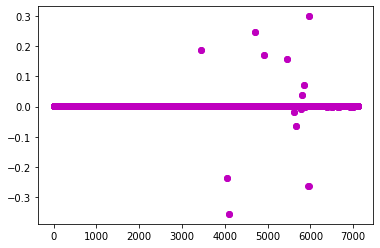

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(G.number_of_nodes()),x2_real,c='m')

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np.array(x2_real).reshape(-1,1)) 
    distortions.append(kmeanModel.inertia_)

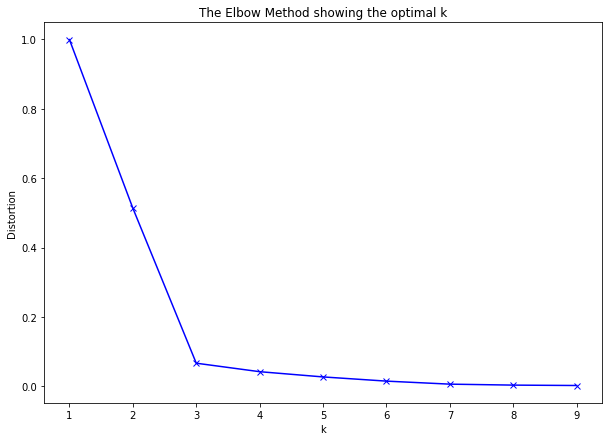

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3).fit(np.array(x2_real).reshape(-1,1)) 

In [24]:
int_nodes = [int(a) for a in nodes]

In [25]:
int_nodes

[30,
 1412,
 3352,
 5254,
 5543,
 7478,
 3,
 28,
 39,
 54,
 108,
 152,
 178,
 182,
 214,
 271,
 286,
 300,
 348,
 349,
 371,
 567,
 581,
 584,
 586,
 590,
 604,
 611,
 8283,
 25,
 6,
 8,
 19,
 23,
 29,
 33,
 35,
 50,
 55,
 75,
 80,
 86,
 94,
 127,
 154,
 192,
 224,
 226,
 246,
 252,
 255,
 257,
 261,
 273,
 280,
 282,
 299,
 302,
 306,
 308,
 310,
 322,
 325,
 339,
 356,
 358,
 363,
 370,
 373,
 377,
 379,
 407,
 415,
 422,
 428,
 439,
 488,
 514,
 545,
 549,
 560,
 592,
 600,
 645,
 650,
 659,
 664,
 667,
 673,
 675,
 696,
 706,
 723,
 739,
 756,
 857,
 864,
 893,
 959,
 994,
 1131,
 3755,
 8282,
 8284,
 4,
 10,
 38,
 56,
 130,
 140,
 147,
 151,
 232,
 243,
 341,
 606,
 5,
 61,
 89,
 93,
 153,
 163,
 167,
 168,
 175,
 34,
 132,
 135,
 171,
 183,
 216,
 219,
 227,
 228,
 236,
 250,
 258,
 259,
 274,
 285,
 290,
 298,
 301,
 304,
 317,
 319,
 359,
 362,
 378,
 390,
 391,
 392,
 394,
 396,
 402,
 405,
 406,
 421,
 427,
 431,
 432,
 433,
 435,
 440,
 447,
 538,
 564,
 566,
 579,
 589,
 60

In [ ]:
textfile = open("idx.txt", "w",encoding='utf8')
for element in kmeans.labels_:
    textfile.write(str(element) + ",")
textfile.close()

In [26]:
textfile = open("idx.txt", "w",encoding='utf8')
for c,element in enumerate(kmeans.labels_):
    textfile.write("idx["+str(int_nodes[c])+"]: "+str(element) )
    textfile.write("\n")
textfile.close()

In [27]:
cluster1 = (np.where(kmeans.labels_==0)[0])
cluster2 = (np.where(kmeans.labels_==1)[0])
cluster3 = (np.where(kmeans.labels_==2)[0])

In [28]:
cluster2

array([3437, 3438, 4696, 4697, 4925, 4926, 5462, 5463, 5961, 5962])

In [29]:
cluster3

array([4050, 4051, 4094, 4095, 5956, 5957])

In [ ]:
cluster1

array([   0,    1,    2, ..., 7112, 7113, 7114])

# **compute min cut**

In [ ]:
clusters = [cluster1,cluster2,cluster3]
m = G.number_of_edges()

In [ ]:
import itertools
def min_cut(clusters,m,G):
  coms = list(itertools.combinations(clusters, 2))
  sum = 0
  for com in coms:
    for i in com[0]:
      for j in com[1]:
        if G.has_edge(i,j):
              sum+=1

  return sum

In [ ]:
min_cut(clusters,m,G)

0

# **compute modularity**

In [ ]:
G.number_of_nodes()

7115

In [ ]:
m = G.number_of_edges()

In [ ]:
m

100762

In [ ]:
clusters = [cluster1,cluster2,cluster3]

In [ ]:
def modularity(clusters,m,G,nodes):
  sums = []
  for cluster in clusters:
    sum = 0
    for i in cluster:
      for j in cluster:
        t = G.degree[nodes[i]]*G.degree[nodes[j]]/(2*m)
        if G.has_edge(nodes[i],nodes[j]):
          a = 1
        else:
          a = 0
        sum+= a - t
    sums.append(sum)
  return(np.sum(sums)/(2*m))

In [ ]:
modularity(clusters,m,G,nodes)

0.00015878036771297253